# Linear Regression in Tensorflow

보스턴 지역의 집값을 Linear regression 모델을 이용하여 예측해보는 랩입니다. The Boston Dataset은 UCI Machine Learning Repository 에 있었습니다만, 현재는 아래 링크를 참조해 주십시오. 또는 R, scikit-learn에서 제공 받을 수 있습니다.

Boston Dataset: http://lib.stat.cmu.edu/datasets/boston

scikit-learn: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

우선 필요한 라이브러리들을 Import합니다. TensorFlow, Numpy, 그리고 matplotlib이 필요합니다.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import numpy as np

from numpy import genfromtxt
from sklearn.datasets import load_boston

Linear regresion model 학습을 위해서 몇 가지 Dataset을 정의합니다.

* read_dataset: csv, tsv 파일을 읽어 Numpy 에 입력
* read_boston_data: Boston dataset을 scikit-learn library에서 가져와서 값과 레이블을 분리해 저장
* feature_nomalize: dataset 항목들을 normalize, 전처리 과정에서 정확도를 위해 중요
* append_bias_reshape: bias 값으로 normalize에 영향을 줍니다. dataset값에 변화를 줌

In [3]:
def read_dataset(filePath,delimiter=','):
    return genfromtxt(filePath, delimiter=delimiter)

def read_boston_data():
    boston = load_boston()
    features = np.array(boston.data)
    labels = np.array(boston.target)
    return features, labels

def feature_normalize(dataset):
    mu = np.mean(dataset,axis=0)
    sigma = np.std(dataset,axis=0)
    return (dataset - mu)/sigma

def append_bias_reshape(features,labels):
    n_training_samples = features.shape[0]
    n_dim = features.shape[1]
    f = np.reshape(np.c_[np.ones(n_training_samples),features],[n_training_samples,n_dim + 1])
    l = np.reshape(labels,[n_training_samples,1])
    return f, l

이제 위의 메소드들을 활용하기 전에 Dataset을 Training용과 Testing용으로 분리합니다. 

In [4]:
features,labels = read_boston_data()
normalized_features = feature_normalize(features)
f, l = append_bias_reshape(normalized_features,labels)
n_dim = f.shape[1]

rnd_indices = np.random.rand(len(f)) < 0.80

train_x = f[rnd_indices]
train_y = l[rnd_indices]
test_x = f[~rnd_indices]
test_y = l[~rnd_indices]

TensorFlow는 TensorFlow만의 데이털 구조를 가지고 있습니다. 그것은 features(입력값 x), lables(출력값 y), weights(파라미터) 등의 값을 입력받습니다. 이제 Linear regression에 필요한 중요한 값들을 입력받습니다.

In [5]:
learning_rate = 0.01
training_epochs = 1000
cost_history = np.empty(shape=[1],dtype=float)

X = tf.placeholder(tf.float32,[None,n_dim])
Y = tf.placeholder(tf.float32,[None,1])
W = tf.Variable(tf.ones([n_dim,1]))

init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


Linear regression 은 TensorFlow에서 세 줄 정도의 코드로 간단히 구현할 수 있습니다. 첫 번째 줄은 입력값과 weights를 연산하고, 두 번째 라인은 Loss function으로 여기서는 square error 방식을 정의합니다. 마지막 줄은 loss minimize를 위한 Gradient descent optimization을 정의합니다.

In [6]:
y_ = tf.matmul(X, W)
cost = tf.reduce_mean(tf.square(y_ - Y))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

이제 Linear regression 모델을 구성하기 위한 부분은 모두 채워졌고, 학습을 진행하는 것만 남았습니다. 아래 코드로 수행할 수 있습니다.

In [7]:
sess = tf.Session()
sess.run(init)

for epoch in range(training_epochs):
    sess.run(training_step,feed_dict={X:train_x,Y:train_y})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: train_x,Y: train_y}))

이제 Linear regression 모델을 만들어졌습니다. 학습된 모델로 새로운 데이터에 대한 예측(prediction) 값을 구할 수 있습니다. 아래 plot은 간단히 1000 interation에 대한 결과를 보여주는 것으로 matplotlib을 이용하여 시각화 한 것입니다.

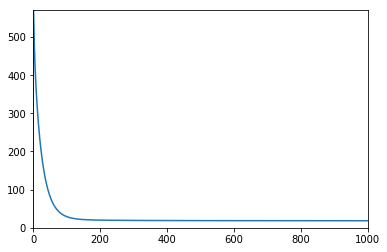

In [8]:
plt.plot(range(len(cost_history)),cost_history)
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

![](https://aqibsaeed.github.io/img/tf_lr_cost.png)

테스트 Dataset을 이용하여 간단히 예측값을 구해 봅니다. 그리고 평균 square error 값(아마도 약 22.23)도 알 수 있습니다. 아래 plot 그래프는 실 가격과 예측 가격을 보여주며, regression line을 시각화하여 보여줍니다. 

In [ ]:
pred_y = sess.run(y_, feed_dict={X: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse)) 

fig, ax = plt.subplots()
ax.scatter(test_y, pred_y)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

![](https://aqibsaeed.github.io/img/tf_lr_pred.png)

TensorFlow 세션은 sess.close()를 호출하는 세션을 종료하도록 합니다.

In [ ]:
sess.close()